# AI-Powered Voice Assistant with Whisper, Llava, and gTTS
This project demonstrates the creation of an AI voice assistant using the Whisper model by OpenAI for speech-to-text, Llava 1.5 7B for multimodal image and text understanding, and gTTS for converting text back into speech. The interface is built using Gradio to allow user interaction via audio and image inputs.


# Install Necessary Libraries
Install required libraries including transformers, BitsAndBytes for quantized models, Whisper, Gradio, and gTTS.

In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 13.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.9 MB/s eta 0:0

# Load and Configure Models
Load the LLaVA model for image-to-text generation using quantization to reduce the memory usage and set up the Whisper model for speech-to-text conversion.


In [ ]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [ ]:
pipe = pipeline("image-to-text",
                model=model_id,
                model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [ ]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS

# Loading and Displaying an Image
Load and display an image to be processed by the LLaVA model.


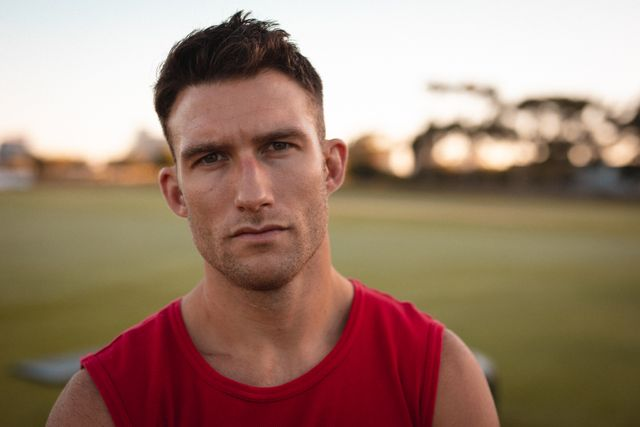

In [ ]:
from PIL import Image
image_path = "img.jpg"
image = Image.open((image_path))
image


# Downloading NLTK Tokenizer


In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Locale Check and Pipeline Execution

In [ ]:
import locale
print(locale.getlocale())  # Before running the pipeline
# Run the pipeline
print(locale.getlocale())  # After running the pipeline

('en_US', 'UTF-8')
('en_US', 'UTF-8')


# Running the Image Description Model

In [ ]:
max_new_tokens = 200

prompt_instructions = """
Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
"""

prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

In [ ]:
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})

In [ ]:
outputs

[{'generated_text': 'USER:  \n\nDescribe the image using as much detail as possible,\nis it a painting, a photograph, what colors are predominant,\nwhat is the image about?\n\nASSISTANT: The image features a man wearing a red shirt, standing on a golf course. He is looking at the camera, possibly posing for a picture. The man appears to be the main subject of the image, and his shirt is the most prominent color in the scene. The golf course setting suggests that the man might be a golfer or simply enjoying a day outdoors.'}]

# Displaying the Generated Text

In [ ]:
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

USER:  

Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
ASSISTANT: The image features a man wearing a red shirt, standing on a golf course.
He is looking at the camera, possibly posing for a picture.
The man appears to be the main subject of the image, and his shirt is the most prominent color in the scene.
The golf course setting suggests that the man might be a golfer or simply enjoying a day outdoors.


In [ ]:
warnings.filterwarnings("ignore")

# Whisper Model for Audio Transcription

In [ ]:
import warnings
from gtts import gTTS
import numpy as np


In [ ]:
torch.cuda.is_available()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.4.1+cu121 (cuda)


In [ ]:
import whisper
model = whisper.load_model("medium", device=DEVICE)
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

100%|██████████████████████████████████████| 1.42G/1.42G [00:13<00:00, 114MiB/s]


Model is multilingual and has 762,321,920 parameters.


# Utility Functions (Logging, Image Processing, and Transcription)

In [ ]:
import re
import datetime
import os

## Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [ ]:
import re
import requests
from PIL import Image

def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much detail as possible. You are a helpful AI assistant who is able to answer questions about the image. What is the image all about? Now generate the helpful answer.
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

    if outputs is not None and len(output[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT: (.*)', outputs[0]["generated_text"])
        if match:
          reply = match.group(1)
        else:
          reply = "No response found."
    else:
        reply = "No response generated."

    return reply


In [ ]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [ ]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

# Gradio Interface

In [ ]:
import gradio as gr
import os
from gtts import gTTS
from PIL import Image
import whisper
import re

# Load Whisper model
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
whisper_model = whisper.load_model("medium", device=DEVICE)

# Transcribe function using Whisper
def transcribe(audio_path):
    if audio_path is not None:
        audio = whisper.load_audio(audio_path)
        audio = whisper.pad_or_trim(audio)
        mel = whisper.log_mel_spectrogram(audio).to(whisper_model.device)

        options = whisper.DecodingOptions()
        result = whisper.decode(whisper_model, mel, options)
        return result.text
    return "No audio provided."

# Corrected img2txt function using LLaVA model
def img2txt(speech_text, image_path):
    if image_path is not None:
        image = Image.open(image_path)

        # Generate a descriptive prompt for the image based on the speech input
        prompt_instructions = f"""
        Describe the image using as much detail as possible based on the following input: {speech_text}.
        """
        prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

        # Run the pipeline with the image and the generated prompt
        outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

        if outputs and len(outputs[0]["generated_text"]) > 0:
            # Extract the assistant's response part
            assistant_response = re.search(r'ASSISTANT: (.*)', outputs[0]["generated_text"])
            if assistant_response:
                return assistant_response.group(1)
        return "No description generated."
    return "No image provided."

# Function for converting text to speech using gTTS
def text_to_speech(text, output_audio_path):
    if text:
        tts = gTTS(text)
        tts.save(output_audio_path)
        return output_audio_path
    return None

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Transcribe the audio file
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input and generate a response
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Convert the generated assistant's response to speech
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")

    return speech_to_text_output, chatgpt_output, processed_audio_path

# Create the Gradio interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(type="filepath"),  # Upload audio file
        gr.Image(type="filepath")   # Upload image file
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="Generated Output from Image"),
        gr.Audio(label="Generated Audio Response")
    ],
    title="Audio & Image Processor with Whisper and LLaVA",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the Gradio interface
iface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://72e6437907d0259f72.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
